In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

from sklearn import datasets

In [3]:
iris = datasets.load_iris()

# Iris Dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set.The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features for each flower,
- sepal length
- sepal width
- petal length
- petal width


Let's make a dataframe from the iris dataset ( which is already in sklearn library).
We only consider first three column for this exercise. You can try with four features in the class.

In [26]:
df = pd.DataFrame({'sepal_length':iris['data'][:,0],'sepal_width':iris['data'][:,1],'petal_length':iris['data'][:,3],'type':iris['target']})

In [106]:
df.sample(5)

,sepal_length,sepal_width,petal_length,type
36,5.5,3.5,0.2,0
34,4.9,3.1,0.2,0
51,6.4,3.2,1.5,1
104,6.5,3.0,2.2,2
107,7.3,2.9,1.8,2


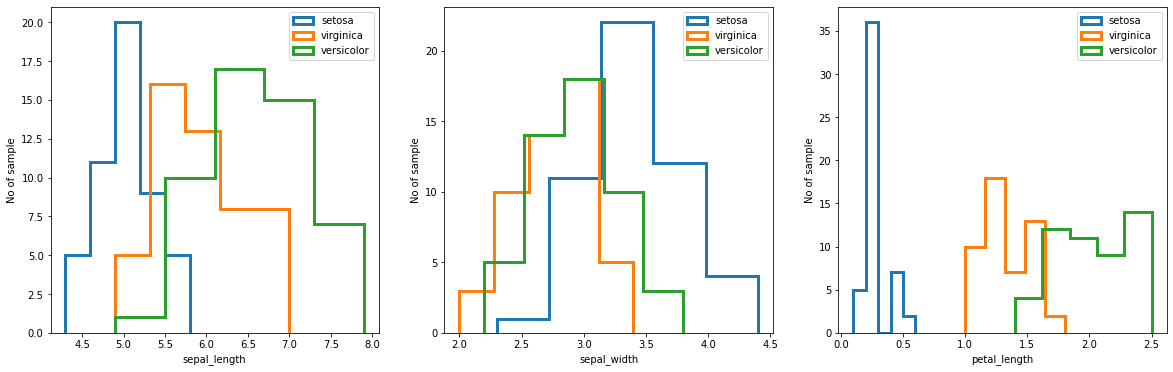

In [40]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
ax =ax.flatten()
for index,feat_ in enumerate(df.columns[:-1]):
    ax[index].hist(df.query('type==0')[feat_],bins=5,label='setosa',histtype='step',lw=3)
    ax[index].hist(df.query('type==1')[feat_],bins=5,label='virginica',histtype='step',lw=3)
    ax[index].hist(df.query('type==2')[feat_],bins=5,label='versicolor',histtype='step',lw=3)
    
    ax[index].set_xlabel(feat_)
    ax[index].set_ylabel('No of sample')
    
    ax[index].legend()

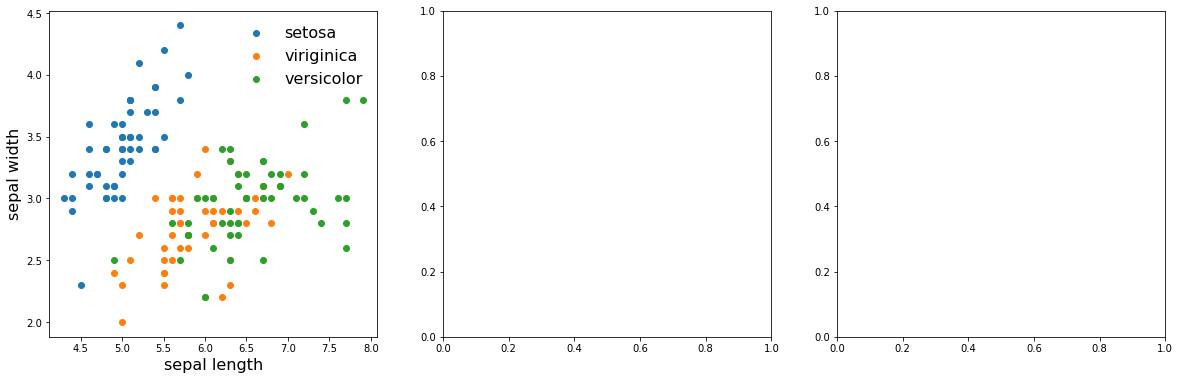

In [55]:
#scatter plot

fig,ax = plt.subplots(1,3,figsize=(20,6))
ax =ax.flatten()

ax[0].scatter(df[df['type']==0]['sepal_length'],df[df['type']==0]['sepal_width'],label='setosa')
ax[0].scatter(df[df['type']==1]['sepal_length'],df[df['type']==1]['sepal_width'],label='viriginica')
ax[0].scatter(df[df['type']==2]['sepal_length'],df[df['type']==2]['sepal_width'],label='versicolor')
ax[0].legend(loc='upper right',fontsize=16,frameon =False)
ax[0].set_xlabel('sepal length',fontsize=16)
ax[0].set_ylabel('sepal width',fontsize=16)

plt.show()


## Please do the other 2D scatter plots



# Making it unsupervised!


Let's assume that we don't know the type or labels of the flower in the dataset aprior. Can we find some intrinsic patter using clustering methods? 

- Let's deploy a KMeans algorithm and find out if we can put the same group of flowers in to clusters!

- First we will do it based on two features, for example using sepal length and sepal width


In [61]:
df_unsupervised = df.drop({'type','petal_length'},axis=1)

In [62]:
df_unsupervised.head(5)

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [85]:
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm
kmeans.fit(df_unsupervised)

KMeans(n_clusters=3)

In [86]:
cluster = kmeans.predict(df_unsupervised)


In [87]:
df_unsupervised['cluster_label']=cluster

#no of unique cluster
clusters = np.unique(cluster)
centers=kmeans.cluster_centers_
df_unsupervised.head()

,sepal_length,sepal_width,cluster_label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


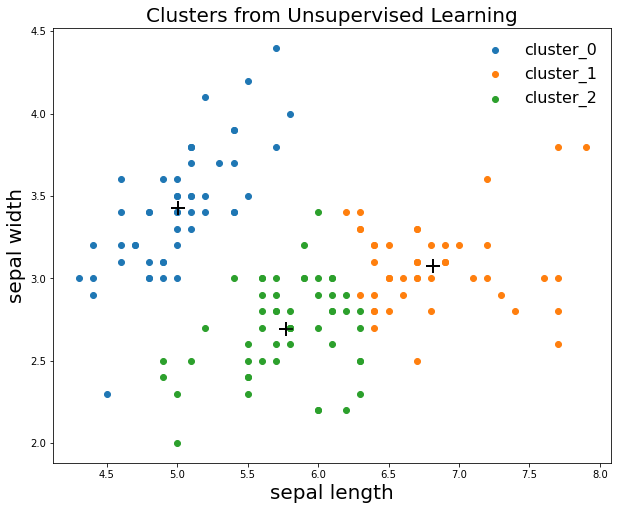

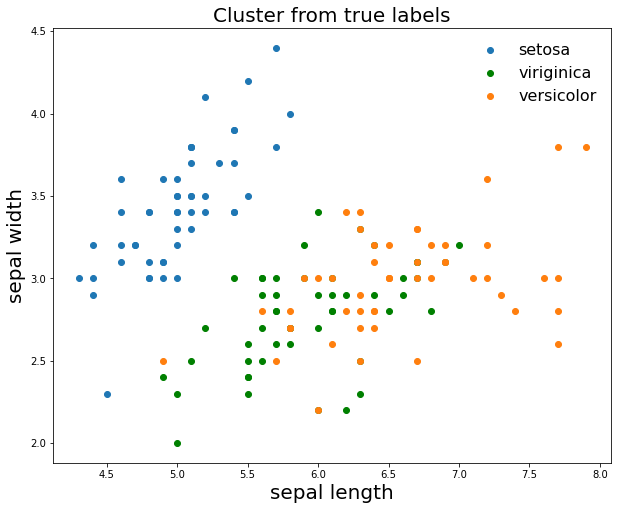

In [118]:
plt.figure(figsize=(10,8))
for cluster in clusters:
    plt.scatter(df_unsupervised[df_unsupervised['cluster_label']==cluster]['sepal_length'],df_unsupervised[df_unsupervised['cluster_label']==cluster]['sepal_width'],label=f'cluster_{cluster}')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1.0,marker='+');
    plt.xlabel('sepal length',fontsize=20)
    plt.ylabel('sepal width',fontsize=20)
    plt.title(f'Clusters from Unsupervised Learning',fontsize=20)
    
    plt.legend(loc='upper right',fontsize=16,frameon =False)

    

    
## IF WE KNOW THE LABELS    
plt.figure(figsize=(10,8))
plt.scatter(df[df['type']==0]['sepal_length'],df[df['type']==0]['sepal_width'],label='setosa')
plt.scatter(df[df['type']==1]['sepal_length'],df[df['type']==1]['sepal_width'],label='viriginica',c='green')
plt.scatter(df[df['type']==2]['sepal_length'],df[df['type']==2]['sepal_width'],label='versicolor',)
plt.xlabel('sepal length',fontsize=20)
plt.ylabel('sepal width',fontsize=20)
plt.title(f'Cluster from true labels',fontsize=20)
    
plt.legend(loc='upper right',fontsize=16,frameon =False)    

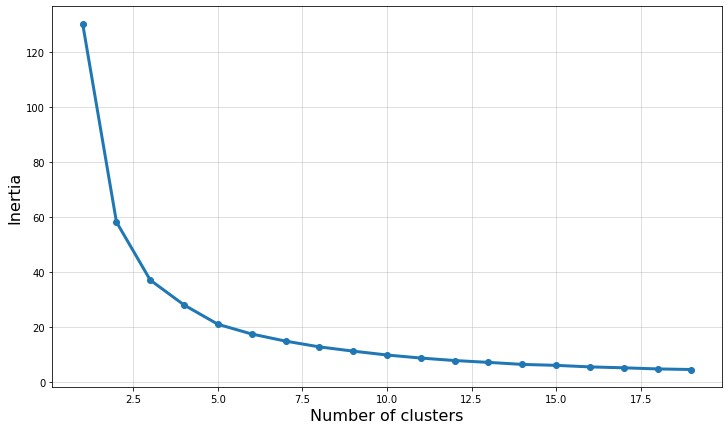

In [121]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_unsupervised.drop('cluster_label',axis=1))
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,7))
plt.plot(frame['Cluster'], frame['SSE'], marker='o',lw=3)
plt.xlabel('Number of clusters',fontsize=16)
plt.ylabel('Inertia',fontsize=16)
plt.grid('--',alpha=0.5)
plt.show()